> # First model >>>>>>> Linear Regression

In [73]:
# import libraies 
import numpy as np
import pandas as pd
from sklearn import metrics, model_selection, linear_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [74]:
# Read the dataset
data = pd.read_csv('who_life_expectancy.xls')

In [75]:
# Exploration 
data.isna().sum()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

In [76]:
data.drop("Country", axis = 1, inplace=True)

In [77]:
# Preprocessing the dataset 
transformed_data = pd.get_dummies(data, columns=['Status']).astype(float)
transformed_data.fillna(transformed_data.mean(), inplace=True)
transformed_data.isna().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developed                   0
Status_Developing                  0
dtype: int64

In [78]:
transformed_data = transformed_data[[col for col in transformed_data.columns if col != 'Life expectancy '] + ['Life expectancy ']]

In [79]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [80]:
# transformed_data['Life expectancy '] = scaler.fit_transform(transformed_data.loc[:, ['Life expectancy ']])

In [81]:
transformed_data_scaled = scaler.fit_transform(transformed_data)

In [83]:
np.savetxt("who_life_expectancy_scaled.csv", transformed_data_scaled, delimiter=",", fmt='%.5f')

In [91]:
# Extract data and target
X = transformed_data_scaled[:, :-1]
y = transformed_data_scaled[:, -1]

In [92]:
# Splitting the data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=42 ,shuffle=True)

In [93]:
# training the model
Regressor_ml = linear_model.LinearRegression()
Regressor_ml.fit(X_train, y_train)

LinearRegression()

In [94]:
# Prediction
y_pred = Regressor_ml.predict(X_test)

In [95]:
# model score
Regressor_ml.score(X_test, y_test)

0.8240562394240223

In [96]:
# Evaluation the model
MSerror = metrics.mean_squared_error(y_test, y_pred)
MAerror = metrics.mean_absolute_error(y_test, y_pred)
RMSerror = np.sqrt(MSerror)
print("RMSE", RMSerror)

RMSE 0.07408387730844881


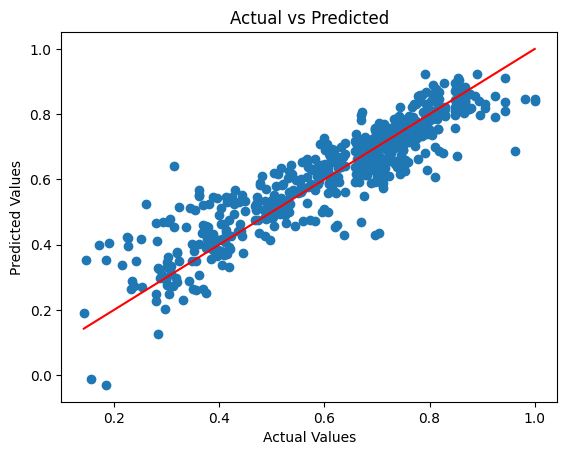

In [97]:
# Visualization the result
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()